In [30]:
import urllib
import datetime as dt
import time
import json
import os.path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
df = pd.read_csv("stock_data_example.csv")
df["Time Stamp"].describe()

pd.to_datetime(df["Time Stamp"],format = '%Y-%m-%d %H:%M:%S' )
df = df.set_index(['Time Stamp'])

open_apple=df.iloc[0,0]
close_apple=df.iloc[-1,0]
change_apple = close_apple-open_apple
high_apple=max(df["AAPL"])
low_apple=min(df["AAPL"])
mean_apple=df["AAPL"].mean()
std_apple=df["AAPL"].std()

open_google=df.iloc[0,1]
close_google=df.iloc[-1,1]
change_google = close_google-open_google
high_google=max(df["GOOGL"])
low_google=min(df["GOOGL"])
mean_google=df["GOOGL"].mean()
std_google=df["GOOGL"].std()

open_tesla=df.iloc[0,2]
close_tesla=df.iloc[-1,2]
change_tesla = close_tesla-open_tesla
high_tesla=max(df["TSLA"])
low_tesla=min(df["TSLA"])
mean_tesla=df["TSLA"].mean()
std_tesla=df["TSLA"].std()

df["t"]=(pd.to_datetime(df.index.values)-pd.to_datetime(df.index.values[0])).astype('timedelta64[s]')

In [60]:
%matplotlib inline

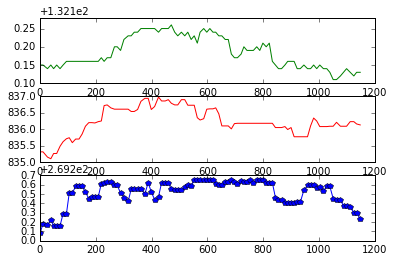

In [22]:
plt.xlabel('Smarts')
plt.ylabel('Probability')

plt.figure(1)

plt.subplot(311)
plt.plot(df["t"], df["AAPL"], 'g-')

plt.subplot(312)
plt.plot(df["t"], df["GOOGL"], 'r-')

plt.subplot(313)
plt.plot(df["t"], df["TSLA"], 'p-')

plt.show()


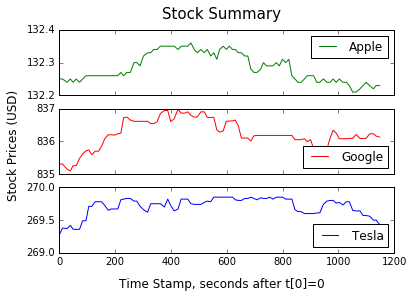

In [147]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False)

fig.text(0.5, 0.004, 'Time Stamp, seconds after t[0]=0', ha='center',fontsize=12)
fig.text(0.004, 0.5, 'Stock Prices (USD)', va='center', rotation='vertical',fontsize=12)
fig.suptitle('Stock Summary 02/10-',fontsize=15)

ax1 = plt.subplot(311)
plt.plot(df["t"], df["AAPL"], 'g-',label="Apple")
plt.legend(loc='upper right')
plt.setp(ax1.get_xticklabels(), visible=False)

plt.yticks(np.arange(132.2,132.41,0.1))

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(df["t"], df["GOOGL"], 'r-',label="Google")
plt.legend(loc='lower right')
# make these tick labels invisible
plt.yticks(np.arange(835.0,837.01,1))
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1)
plt.plot(df["t"], df["TSLA"], 'b-',label='Tesla')
plt.legend(loc='lower right')

plt.yticks(np.arange(269,270.01,0.5))

plt.xlim(0.01,1200)
plt.xticks(np.arange(0,1201,200))

ax3.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.show()




In [77]:
df

,AAPL,GOOGL,TSLA,t
Time Stamp,,,,
2017-02-10 09:03:41,132.25,835.31,269.28,0
2017-02-10 09:03:52,132.25,835.31,269.38,11
2017-02-10 09:04:08,132.24,835.15,269.37,27
2017-02-10 09:04:20,132.25,835.10,269.42,39
2017-02-10 09:04:30,132.24,835.26,269.36,49
2017-02-10 09:04:41,132.25,835.26,269.36,60
2017-02-10 09:04:53,132.24,835.48,269.36,72
2017-02-10 09:05:04,132.25,835.62,269.49,83
2017-02-10 09:05:16,132.26,835.71,269.49,95


In [83]:
a = [2.555,3.555]
np.around(a,2)

array([ 2.56,  3.56])

In [99]:
np.arange(1,5,1)

array([1, 2, 3, 4])